In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_table('/home/aritra/1.1 NaiveBayes.zip/NaiveBayes/SMSSpamCollection',header=None,names=['class','sms'])

In [3]:
data.tail()

,class,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
spamHamCount=data['class'].value_counts()
spamHamCount

ham     4825
spam     747
Name: class, dtype: int64

In [5]:
type(spamHamCount)

pandas.core.series.Series

In [6]:
print(spamHamCount[0])

4825


In [7]:
print('The spam Percentage is:',float(spamHamCount[1]/(spamHamCount[0]+spamHamCount[1]))*100,'%')
print('The ham Percentage is:',float(spamHamCount[0]/(spamHamCount[0]+spamHamCount[1]))*100,'%')

The spam Percentage is: 13.406317300789663 %
The ham Percentage is: 86.59368269921033 %


In [8]:
data.describe()

,class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [10]:
data['label']=data['class'].map({'spam':1,'ham':0})

In [11]:
data.head()

,class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
data['length']=data['sms'].apply(len)

In [13]:
data.head(10)

,class,sms,label,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,157
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


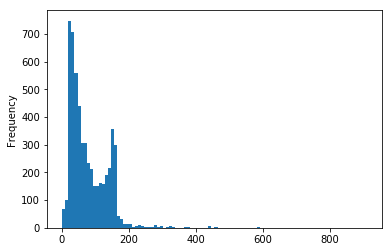

In [14]:
data['length'].plot(bins=100,kind='hist')

In [15]:
max(data['length'])

910

Printing the max sms.

In [16]:
data[data['length']==910]['sms']

1085    For me the love should start with attraction.i...
Name: sms, dtype: object

In [17]:
x=data['sms']
y=data['label']

In [18]:
type(x)

pandas.core.series.Series

In [19]:
print(x.shape,y.shape)

(5572,) (5572,)


import string
from nltk.corpus import stopwords
def processText(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457,)
(4457,)
(1115,)
(1115,)


In [26]:
x_train.head()

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
Name: sms, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [31]:
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
#printing the vocabulary that is the row of heading containing all the words
vect.vocabulary_

{'reply': 5513,
 'win': 7223,
 '100': 258,
 'weekly': 7163,
 '2006': 354,
 'fifa': 2725,
 'world': 7301,
 'cup': 2050,
 'held': 3263,
 'send': 5801,
 'stop': 6265,
 '87239': 695,
 'end': 2498,
 'service': 5819,
 'hello': 3268,
 'sort': 6110,
 'town': 6739,
 'dont': 2336,
 'rush': 5651,
 'home': 3334,
 'eating': 2441,
 'nachos': 4510,
 'let': 3933,
 'know': 3805,
 'eta': 2556,
 'come': 1848,
 'guoyang': 3161,
 'tell': 6513,
 'told': 6687,
 'hey': 3288,
 'sathya': 5706,
 'till': 6641,
 'dint': 2266,
 'meet': 4262,
 'single': 5961,
 'time': 6642,
 'saw': 5719,
 'situation': 5978,
 'orange': 4785,
 'brings': 1462,
 'ringtones': 5589,
 'chart': 1680,
 'heroes': 3284,
 'free': 2868,
 'hit': 3304,
 'week': 7160,
 'pics': 5002,
 'wap': 7106,
 'receiving': 5429,
 'tips': 6648,
 'sitting': 5977,
 'mu': 4468,
 'waiting': 7080,
 'suite': 6353,
 'shower': 5912,
 'finish': 2750,
 'liao': 3939,
 'urgent': 6934,
 'mobile': 4383,
 '07808726822': 39,
 'awarded': 1140,
 '000': 1,
 'bonus': 1382,
 'caller

In [35]:
x_train_transformed=vect.transform(x_train)
y_train_transformed=vect.transform(x_test)

In [36]:
print(type(x_train_transformed))
print(x_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 258)	1
  (0, 354)	1
  (0, 695)	1
  (0, 2050)	1
  (0, 2498)	1
  (0, 2725)	1
  (0, 3263)	1
  (0, 5513)	1
  (0, 5801)	1
  (0, 5819)	1
  (0, 6265)	1
  (0, 7163)	1
  (0, 7223)	1
  (0, 7301)	1
  (1, 2336)	1
  (1, 2441)	1
  (1, 2556)	1
  (1, 3268)	1
  (1, 3334)	1
  (1, 3805)	1
  (1, 3933)	1
  (1, 4510)	1
  (1, 5651)	1
  (1, 6110)	1
  (1, 6739)	1
  :	:
  (4452, 2439)	1
  (4452, 3085)	1
  (4452, 3291)	1
  (4452, 3979)	1
  (4452, 7265)	1
  (4452, 7281)	1
  (4453, 3875)	1
  (4453, 4005)	1
  (4453, 6109)	1
  (4454, 2894)	1
  (4454, 3250)	1
  (4454, 5150)	1
  (4454, 5410)	1
  (4454, 6114)	1
  (4454, 6115)	1
  (4455, 3692)	1
  (4455, 4661)	1
  (4455, 5816)	1
  (4455, 6687)	1
  (4456, 2237)	1
  (4456, 3721)	1
  (4456, 4519)	1
  (4456, 5720)	1
  (4456, 6079)	1
  (4456, 6468)	1
